# IMPORTAÇÃO DE BIBLIOTECAS E DRIVE

As 4 primeiras linhas foram adicionadas antes de saber o que seria necessário durante a execução do TCC. As seguintes foram acrescentadas assim que necessário.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

Montagem do Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORTAÇÃO DE DADOS

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/tcc/dataframes/df_pre.csv")

# AJUSTES INICIAIS

Definido a coluna codigo como index para não influenciar no processo de modelagem.

In [ ]:
df = df.set_index("codigo")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 110001 to 250523
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   aids                  5570 non-null   int64  
 1   animais               5570 non-null   int64  
 2   dengue                5570 non-null   int64  
 3   hanseniase            5570 non-null   int64  
 4   hepatites             5570 non-null   int64  
 5   sadquirida            5570 non-null   int64  
 6   scongenita            5570 non-null   int64  
 7   sgestante             5570 non-null   int64  
 8   toxico                5570 non-null   int64  
 9   tuberculose           5570 non-null   int64  
 10  autoprovocada_sim     5570 non-null   int64  
 11  autoprovocada_não     5570 non-null   int64  
 12  violencia             5570 non-null   int64  
 13  estabelecimentos      5570 non-null   int64  
 14  profissionais         5570 non-null   int64  
 15  estado        

Definido como "category" as variáveis categóricas.

In [ ]:
df["estado"] = df["estado"].astype("category")
df["metropolitana"] = df["metropolitana"].astype("category")
df["amazonia"] = df["amazonia"].astype("category")
df["semiarido"] = df["semiarido"].astype("category")
df["regiao"] = df["regiao"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 110001 to 250523
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   aids                  5570 non-null   int64   
 1   animais               5570 non-null   int64   
 2   dengue                5570 non-null   int64   
 3   hanseniase            5570 non-null   int64   
 4   hepatites             5570 non-null   int64   
 5   sadquirida            5570 non-null   int64   
 6   scongenita            5570 non-null   int64   
 7   sgestante             5570 non-null   int64   
 8   toxico                5570 non-null   int64   
 9   tuberculose           5570 non-null   int64   
 10  autoprovocada_sim     5570 non-null   int64   
 11  autoprovocada_não     5570 non-null   int64   
 12  violencia             5570 non-null   int64   
 13  estabelecimentos      5570 non-null   int64   
 14  profissionais         5570 non-null   int64   
 1

Criação das variáveis dummies.

In [ ]:
dummies = pd.get_dummies(df[["estado", "metropolitana", "amazonia", "semiarido", "regiao"]])

In [ ]:
dummies

,estado_AC,estado_AL,estado_AM,estado_AP,estado_BA,estado_CE,estado_DF,estado_ES,estado_GO,estado_MA,...,metropolitana_1,amazonia_0,amazonia_1,semiarido_0,semiarido_1,regiao_CO,regiao_N,regiao_NE,regiao_S,regiao_SE
codigo,,,,,,,,,,,,,,,,,,,,,
110001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
110037,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
110040,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
110034,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
110002,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522145,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
522157,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
220460,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


# LINEAR REGRESSION

In [ ]:
X = df[["estabelecimentos", "profissionais", "agropecuaria", "industria", "servicos", 
        "servicos_basicos", "impostos", "pib", "per_capita", "populacao", "latitude", "longitude", "nascimentos", "mortalidade_geral", "mortalidade_infantil"]]
X = X.join(dummies)
y = df["sadquirida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1986) 
model = LinearRegression()
model.fit(X_train,y_train)
model.predict(X_test)
test_predictions = model.predict(X_test)
test_predictions
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

77.03442755472118

In [ ]:
RMSE

296.6939255172583

Lista de capitais brasileiras separadas por região, seguida de cidades do interesse pessoal do autor.

NORTE


Rio Branco (AC)
120040

Macapá (AP)
160030

Manaus (AM)
130260

Belém (PA)
150140

Porto Velho (RO)
110020

Boa Vista (RR)
140010

Palmas (TO)
172100



NORDESTE


Maceió (AL)
270430

Salvador (BA)
292740

Fortaleza (CE)
230440

São Luís (MA)
211130

João Pessoa (PB)
250750

Recife (PE)
261160

Teresina (PI)
221100

Natal (RN)
240810

Aracaju (SE)
280030



CENTRO-OESTE


Brasília (DF)
530010

Goiânia (GO)
520870

Cuiabá (MT)
510340

Campo Grande (MS)
500270



SUDESTE


Vitória (ES)
320530

Belo Horizonte (MG)
310620

Rio de Janeiro (RJ)
330455

São Paulo (SP)
355030



SUL


Curitiba (PR)
410690

Florianópolis (SC)
420540

Porto Alegre (RS)
431490


OUTRAS CIDADES

Muriaé (MG)
314390

Bambuí (MG)
310510

Viçosa (MG)
317130

Sabinópolis (MG)
315680

Ouro Preto (MG)
314610

Conselheiro Lafaiete (MG)
311830 

Manhuaçu (MG)
313940

Juiz de Fora (MG)
313670

Guarapari (ES)
320240

Campinas (SP)
350950

Campos do Jordão (SP)
350970

Porto Seguro (BA)
292530

Itacaré (BA)
291490

Ilhéus (BA)
291360

Balneário Camboriú (SC)
420200

Cabo Frio (RJ)
330070

Petrópolis (RJ)
330390






Criação da lista com as cidades a serem avaliadas.

In [ ]:
cities = [120040, 160030, 130260, 150140, 110020, 140010, 172100, 270430, 292740, 230440, 211130, 250750, 261160, 221100, 240810, 280030, 530010, 520870, 510340, 500270, 320530, 310620, 330455, 355030, 
          410690, 420540, 431490, 314390, 310510, 317130, 315680, 314610, 311830, 313940, 313670,  320240, 350950, 350970, 292530, 291490, 291360, 420200, 330070, 330390]

Criação da coluna com os valores previstos pelo modelo.

In [ ]:
d1 = pd.Series(model.predict(X.loc[cities, :]))
d2 = y[cities]
d1 = d1.reset_index()
d2 = d2.reset_index()
d3 = pd.concat([d1, d2], axis=1)
d3 = d3.rename({0: "previsto"}, axis=1)
d3 = d3[["previsto", "sadquirida", "codigo"]]
d3

,previsto,sadquirida,codigo
0,1380.758378,25,120040
1,790.481741,776,160030
2,2302.684687,7463,130260
3,3234.137232,2715,150140
4,1784.115369,1126,110020
5,1735.547544,1538,140010
6,1814.442842,1663,172100
7,2428.844333,227,270430
8,8442.220551,9612,292740
9,8543.598961,3801,230440


Plotagem do gráfico com todas as cidades da lista.
Nota-se imensa variabilidade entre os valores e difícil interpretação.
Optei por separar as cidades por quantidade de notificação.

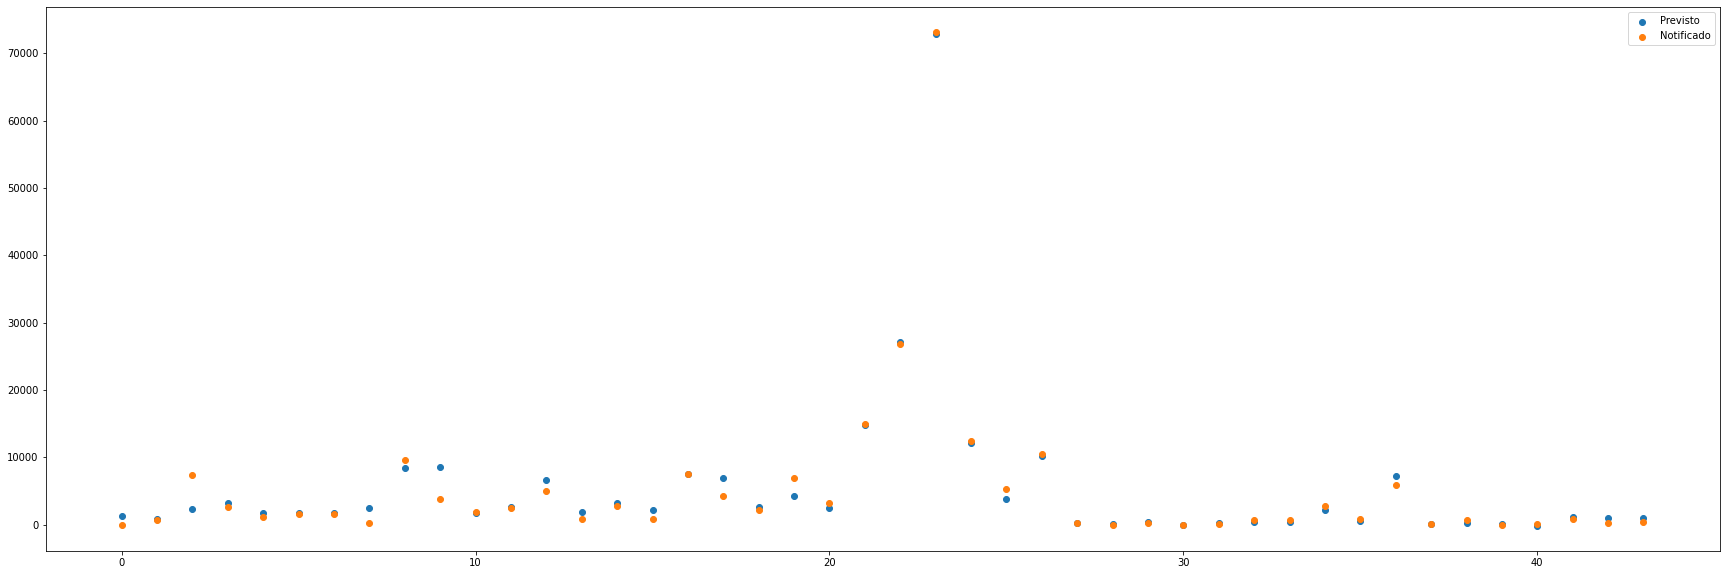

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.scatter(d3.index, d3["previsto"], label="Previsto")
ax.scatter(d3.index, d3["sadquirida"], label="Notificado")
ax.legend()
plt.show()

Cidades com até 5 mil casos notificados de sífilis adquirida.

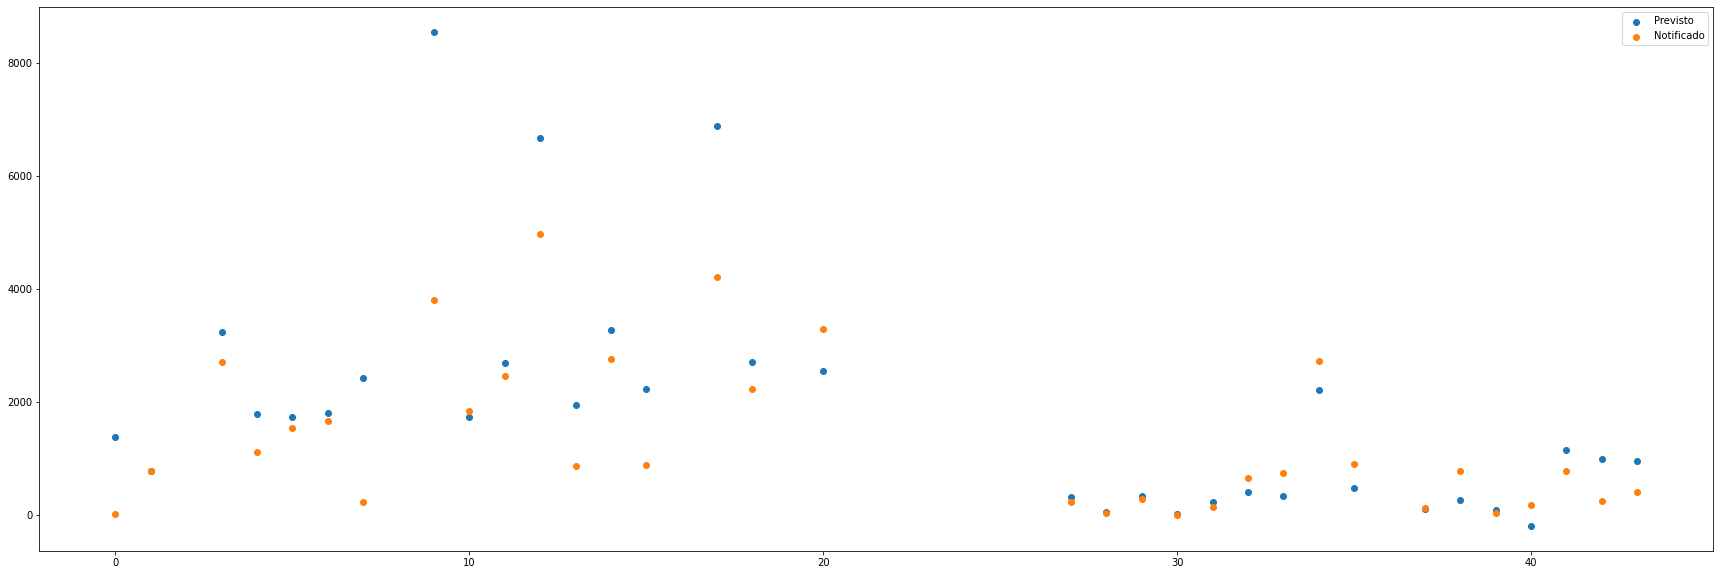

In [ ]:
d4 = d3[d3["sadquirida"]<5000]
fig, ax = plt.subplots(figsize=(30, 10))
ax.scatter(d4.index, d4["previsto"], label="Previsto")
ax.scatter(d4.index, d4["sadquirida"], label="Notificado")
ax.legend()
plt.show()

Cidades com mais de 5 mil casos, exceto São Paulo que mais uma vez atrapalharia a visualização dos dados.

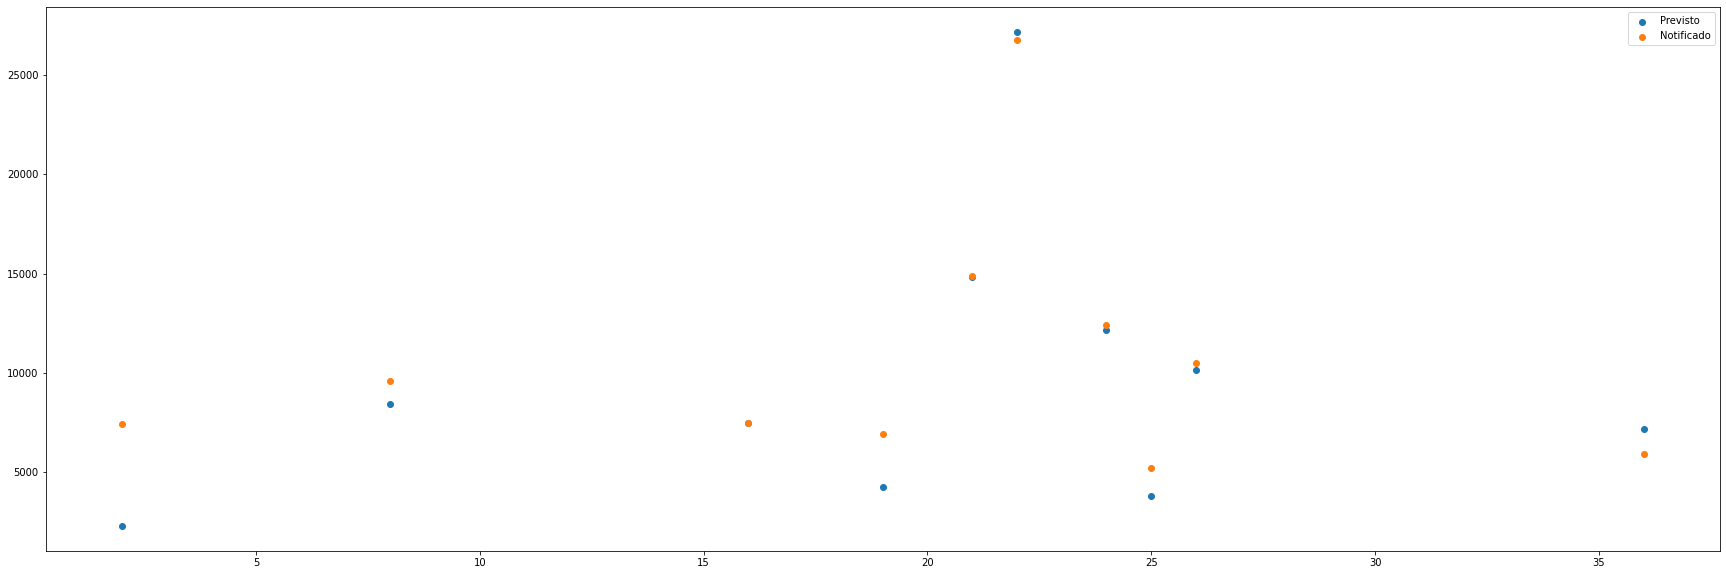

In [ ]:
d5 = d3[d3["sadquirida"]>=5000]
d5 = d5[d5["sadquirida"]<70000]
fig, ax = plt.subplots(figsize=(30, 10))
ax.scatter(d5.index, d5["previsto"], label="Previsto")
ax.scatter(d5.index, d5["sadquirida"], label="Notificado")
ax.legend()
plt.show()

# SUPPORT VECTOR REGRESSION




In [ ]:
X = df[["estabelecimentos", "profissionais", "agropecuaria", "industria", "servicos", 
        "servicos_basicos", "impostos", "pib", "per_capita", "populacao", "latitude", "longitude", "nascimentos", "mortalidade_geral", "mortalidade_infantil"]]
X = X.join(dummies)
y = df["sadquirida"]
X_sc = StandardScaler()
X_normalizado = X_sc.fit_transform(X)
y_sc = StandardScaler()
y_normalizado = y_sc.fit_transform(pd.DataFrame(y))
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y_normalizado, test_size= 0.3, random_state=1986)
model = SVR(kernel="rbf")
model.fit(X_train,y_train)
model.predict(X_test)
test_predictions = model.predict(X_test)
test_predictions
test_predictions_desnormalizado = y_sc.inverse_transform(pd.DataFrame(test_predictions))
y_test_desnormalizado = y_sc.inverse_transform(pd.DataFrame(y_test))
MAE = mean_absolute_error(y_test_desnormalizado,test_predictions_desnormalizado)
MSE = mean_squared_error(y_test_desnormalizado,test_predictions_desnormalizado)
RMSE = np.sqrt(MSE)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
MAE

94.32380962217698

In [ ]:
RMSE

335.2327940854002

# NEURAL NETWORK REGRESSION



In [ ]:
X = df[["estabelecimentos", "profissionais", "agropecuaria", "industria", "servicos", 
        "servicos_basicos", "impostos", "pib", "per_capita", "populacao", "latitude", "longitude", "nascimentos", "mortalidade_geral", "mortalidade_infantil"]]
X = X.join(dummies)
y = df["sadquirida"]
X_sc = StandardScaler()
X_normalizado = X_sc.fit_transform(X)
y_sc = StandardScaler()
y_normalizado = y_sc.fit_transform(pd.DataFrame(y))
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y_normalizado, test_size= 0.3, random_state=1986) 
model = Sequential()
model.add(Dense(100, input_shape=(53,), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()]) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               5400      
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,501
Trainable params: 5,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train, epochs= 50)

Epoch 1/50
122/122 [==============================] - 1s 2ms/step - loss: 1.3098 - mean_squared_error: 1.3098
Epoch 2/50
122/122 [==============================] - 0s 2ms/step - loss: 1.2632 - mean_squared_error: 1.2632
Epoch 3/50
122/122 [==============================] - 0s 2ms/step - loss: 1.2580 - mean_squared_error: 1.2580
Epoch 4/50
122/122 [==============================] - 0s 2ms/step - loss: 1.2559 - mean_squared_error: 1.2559
Epoch 5/50
122/122 [==============================] - 0s 2ms/step - loss: 1.2549 - mean_squared_error: 1.2549
Epoch 6/50
122/122 [==============================] - 0s 2ms/step - loss: 1.2543 - mean_squared_error: 1.2543
Epoch 7/50
122/122 [==============================] - 0s 2ms/step - loss: 1.2538 - mean_squared_error: 1.2538
Epoch 8/50
122/122 [==============================] - 0s 2ms/step - loss: 1.2535 - mean_squared_error: 1.2535
Epoch 9/50
122/122 [==============================] - 0s 2ms/step - loss: 1.2533 - mean_squared_error: 1.2533
Epoch 10/5

In [ ]:
model.predict(X_test)
test_predictions = model.predict(X_test)
test_predictions
test_predictions_desnormalizado = y_sc.inverse_transform(test_predictions)
y_test_desnormalizado = y_sc.inverse_transform(y_test)
MAE = mean_absolute_error(y_test_desnormalizado,test_predictions_desnormalizado)
MSE = mean_squared_error(y_test_desnormalizado,test_predictions_desnormalizado)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

124.1905405945153

In [ ]:
RMSE

360.48151835135025

# LINEAR REGRESSION (GRID SEARCH)

In [ ]:
X = df[["estabelecimentos", "profissionais", "agropecuaria", "industria", "servicos", 
        "servicos_basicos", "impostos", "pib", "per_capita", "populacao", "latitude", "longitude", "nascimentos", "mortalidade_geral", "mortalidade_infantil"]]
X = X.join(dummies)
y = df["sadquirida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1986)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
base_elastic_model = ElasticNet()
param_grid1 = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid1,
                          scoring='neg_mean_squared_error',
                          cv=200,
                          verbose=2)
grid_model.fit(X_train,y_train)
grid_model.best_estimator_
grid_model.best_params_
pd.DataFrame(grid_model.cv_results_)

Fitting 200 folds for each of 42 candidates, totalling 8400 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.559e+06, tolerance: 6.854e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.809e+06, tolerance: 6.982e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.3s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.141e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.001e+07, tolerance: 7.053e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.092e+07, tolerance: 7.055e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.093e+07, tolerance: 7.064e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.126e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.125e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.127e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.142e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.751e+07, tolerance: 7.019e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.124e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.146e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.128e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.903e+07, tolerance: 6.917e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.142e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.165e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.147e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.104e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.141e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.181e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.643e+07, tolerance: 7.019e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.153e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.152e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.088e+07, tolerance: 6.854e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.161e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.129e+07, tolerance: 7.053e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.221e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.144e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.130e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.822e+07, tolerance: 7.026e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.141e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.144e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.156e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.193e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.143e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.994e+07, tolerance: 7.039e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.124e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.159e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.019e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.150e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.221e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.079e+07, tolerance: 6.982e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.128e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.222e+07, tolerance: 7.058e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s
[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.146e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.129e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.128e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.091e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.151e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.105e+07, tolerance: 7.060e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.538e+06, tolerance: 6.362e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.175e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.172e+07, tolerance: 7.065e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.143e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.071e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.069e+07, tolerance: 7.058e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.148e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.143e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.083e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.201e+07, tolerance: 7.058e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.175e+07, tolerance: 7.065e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.128e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.123e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.130e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.170e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.166e+07, tolerance: 7.039e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.144e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.112e+07, tolerance: 7.064e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.142e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.152e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.119e+07, tolerance: 7.062e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.158e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.048e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+07, tolerance: 7.069e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+07, tolerance: 7.046e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.129e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.155e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.064e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.845e+07, tolerance: 7.053e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.062e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.055e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.060e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.061e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.062e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.055e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.984e+07, tolerance: 7.055e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.963e+07, tolerance: 7.064e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.036e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.074e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.022e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.052e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.035e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.062e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.630e+07, tolerance: 7.019e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.053e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.010e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.133e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.055e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.027e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.778e+07, tolerance: 6.917e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.052e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.066e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.046e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.085e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.062e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.060e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.060e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.060e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.060e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.956e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.031e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.990e+07, tolerance: 7.019e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.069e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.044e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.090e+07, tolerance: 6.854e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.078e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.060e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.974e+07, tolerance: 7.053e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.091e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.046e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.060e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.511e+07, tolerance: 7.026e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.062e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.080e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.066e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.073e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.095e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.028e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.104e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.985e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.054e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.055e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.061e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.614e+07, tolerance: 7.039e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.047e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.082e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.054e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.724e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.048e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.051e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.989e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.159e+07, tolerance: 6.982e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.047e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.058e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.060e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.195e+06, tolerance: 1.738e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.064e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.060e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.053e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.023e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.054e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.046e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.031e+07, tolerance: 7.060e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.605e+07, tolerance: 6.362e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.069e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.047e+07, tolerance: 7.065e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.065e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.019e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.897e+07, tolerance: 7.058e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.067e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.066e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.028e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.044e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.049e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.054e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.121e+07, tolerance: 7.058e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.989e+07, tolerance: 7.065e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.042e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.054e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.055e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.054e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.046e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.038e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.077e+07, tolerance: 7.039e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.062e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.981e+07, tolerance: 7.064e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.019e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.062e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.051e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.037e+07, tolerance: 7.062e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.975e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.055e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.055e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.054e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.060e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.055e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.055e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.942e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.997e+07, tolerance: 7.069e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.057e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.826e+07, tolerance: 7.046e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.047e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.046e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.068e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.045e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.038e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.058e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.135e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.276e+07, tolerance: 7.053e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.101e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.096e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.111e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.113e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.093e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.096e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.089e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.085e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.092e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.094e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.226e+07, tolerance: 7.055e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.147e+07, tolerance: 7.064e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.070e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.023e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.097e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.038e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.213e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.101e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.052e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.141e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.114e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.121e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.116e+07, tolerance: 7.019e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.085e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.112e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.093e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.098e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.136e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.124e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.098e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.094e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.082e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.105e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.117e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.147e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.103e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.021e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.357e+07, tolerance: 6.917e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.110e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.028e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.092e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.089e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.135e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.049e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.092e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.108e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.090e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.175e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.130e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.115e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.099e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.102e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.033e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.093e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.109e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.086e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.362e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.094e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.690e+07, tolerance: 7.019e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.093e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.120e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.087e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.964e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.089e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.103e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.096e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.054e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.913e+07, tolerance: 6.854e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.101e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.163e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.121e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.079e+07, tolerance: 7.053e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.087e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.289e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.085e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.094e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.093e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.136e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.114e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.387e+07, tolerance: 7.026e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.233e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.085e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.093e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.173e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.238e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.092e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.068e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.081e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.096e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.347e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.090e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.096e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.089e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.087e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.096e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.090e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.129e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.817e+07, tolerance: 7.039e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.125e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.210e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.093e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.106e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.764e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.100e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.022e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.101e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.336e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.589e+07, tolerance: 6.982e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.446e+07, tolerance: 7.058e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.105e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.104e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.059e+07, tolerance: 1.738e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.084e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.151e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.098e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.094e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.203e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.102e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.096e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.212e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.006e+07, tolerance: 7.060e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.496e+07, tolerance: 6.362e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.191e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.085e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.400e+07, tolerance: 7.065e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.104e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.916e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.094e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.364e+07, tolerance: 7.058e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.153e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.136e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.114e+07, tolerance: 7.070e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.099e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.089e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.067e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.089e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.093e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.092e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.093e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.277e+07, tolerance: 7.058e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.920e+07, tolerance: 7.065e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.083e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.065e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.063e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.067e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.296e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.926e+07, tolerance: 7.039e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.207e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.087e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e+07, tolerance: 7.064e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.115e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.182e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.915e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.075e+07, tolerance: 7.062e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.966e+07, tolerance: 7.066e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.086e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.110e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.089e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.092e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.103e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.140e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.100e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.471e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.094e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.137e+07, tolerance: 7.069e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.092e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.978e+07, tolerance: 7.046e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.063e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.103e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.124e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.160e+07, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.033e+07, tolerance: 7.068e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.938e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.120e+07, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.083e+07, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+06, tolerance: 7.053e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.118e+06, tolerance: 7.026e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.351e+05, tolerance: 7.039e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.856e+05, tolerance: 7.073e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.340e+05, tolerance: 7.071e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.290e+06, tolerance: 6.982e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.259e+05, tolerance: 7.058e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.3s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.317e+05, tolerance: 1.738e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.212e+05, tolerance: 7.072e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.356e+05, tolerance: 7.058e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.450e+06, tolerance: 7.065e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.856e+05, tolerance: 7.039e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Streaming output truncated to the last 5000 lines.
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split193_test_score,split194_test_score,split195_test_score,split196_test_score,split197_test_score,split198_test_score,split199_test_score,mean_test_score,std_test_score,rank_test_score
0,0.185274,0.085908,0.001340,0.001245,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-6529.282430,-373845.152295,-1775.718726,...,-7581.562264,-30323.706848,-34864.109745,-43596.218614,-42538.337109,-18471.860469,-6068.028891,-2.069836e+05,1.877561e+06,8
1,0.139740,0.010744,0.001167,0.000383,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-5600.448909,-372931.548303,-1488.576067,...,-7340.331272,-28910.637720,-39649.569067,-37243.637554,-41832.468104,-16706.526396,-5691.659553,-1.887638e+05,1.668860e+06,4
2,0.175613,0.040072,0.001357,0.000724,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-5070.697152,-374767.431723,-1340.140066,...,-7179.263851,-27983.122752,-42997.433172,-33002.627257,-41629.986836,-15547.102292,-5496.434658,-1.779284e+05,1.529599e+06,3
3,0.254067,0.040658,0.001248,0.000461,0.1,0.9,"{'alpha': 0.1, 'l1_ratio': 0.9}",-4533.450700,-384350.711276,-1183.837485,...,-7051.606280,-26350.124584,-44645.075339,-27042.083594,-42847.795780,-13857.367542,-5332.821996,-1.731480e+05,1.357667e+06,2
4,0.264914,0.055720,0.001246,0.000518,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-4393.930671,-395407.022727,-1125.022584,...,-7148.360410,-25420.313834,-42812.658700,-24444.815026,-44218.939273,-13286.764871,-5261.383818,-1.945930e+05,1.425200e+06,6
5,0.257762,0.033506,0.001202,0.000432,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-4767.888299,-430886.336002,-1031.033962,...,-8216.445450,-24086.078343,-35844.684362,-17821.019840,-47333.934434,-14722.195696,-4956.526499,-3.954356e+05,3.044471e+06,21
6,0.257133,0.010048,0.001405,0.000537,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-6455.208503,-448561.535873,-1317.011009,...,-9196.699958,-25854.412417,-36802.244776,-9648.962057,-41724.397978,-14944.746288,-3988.206475,-8.379620e+05,7.967776e+06,32
7,0.025447,0.008328,0.001324,0.000732,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-9766.399162,-291738.221754,-2354.222529,...,-10151.537601,-34693.087880,-23564.150600,-51627.112092,-41298.910632,-24598.647305,-6887.015924,-3.843659e+05,4.290215e+06,20
8,0.027987,0.006621,0.001158,0.000229,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-9580.015870,-343001.107902,-2497.514498,...,-9435.900337,-34436.812061,-24474.023711,-57429.753354,-43780.459299,-24488.594430,-7332.515513,-3.145223e+05,3.256925e+06,16
9,0.036294,0.007445,0.001180,0.000513,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-8909.972727,-365326.250711,-2381.374023,...,-8793.193475,-33522.218352,-26467.545496,-56288.400017,-44313.444207,-23117.542937,-7084.936680,-2.725019e+05,2.666542e+06,14


In [ ]:
y_pred = grid_model.predict(X_test)
mean_absolute_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
MAE

69.37446863773619

In [ ]:
RMSE

293.33039295079186